1. Consider the task of constructing a network of perceptrons that computes the XOR function. If this is possible, specify the network. If it is not possible, explain why it can’t be done.

A perceptron, mimicking a human neuron, can solve a linear problem such as AND or OR, but there is a limit to solving non-linear problems such as XOR. Multilayer perceptrons, however, can solve this problem, but the complexity of the operation becomes complicated as the layer becomes complex, making it difficult to learn the weight and bias of each layer. To solve this learning problem, we find the error through the given weight and bias and then adjust each layer by going back to the layer. This is called Backpropagation.

In a simpler way, you can solve the XOR problem with three perceptrons. The three perceptrons have the logic of NAND, OR, and AND, respectively. Layers are composed of two layers: NAND and OR in the first layer and AND in the second layer. The input values pass through the first two perceptrons, NAND and OR, and the output value becomes the input value of AND. Finally, the value output through the AND is output the same as the XOR value, so that the XOR problem can be solved.

```
 Input 1    Input2       NAND          OR       AND
   0          0            1            0        0   
   1          0            1            1        1
   0          1            1            1        1   
   1          1            0            0        0

```

2. Use Python/NumPy/Pandas/Keras to load and manipulate the Boston Housing Dataset as follows.

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

boston_df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv", sep=",")

a. Compute the dimensions of the data structures. Include code to print these values.

Display the data size, shape and dimensions.

In [271]:
print("Size = {}\nShape ={}\nShape[0] x Shape[1] = {}". 
format(boston_df.size, boston_df.shape, boston_df.shape[0]*boston_df.shape[1])) 
  
print("n dimensions = {}". 
format(boston_df.ndim)) 

Size = 7084
Shape =(506, 14)
Shape[0] x Shape[1] = 7084
n dimensions = 2


Display the first few records of a data frame.

In [169]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.0,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296,15.3,396.9,5.0,24.0
1,0.0,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242,17.8,396.9,9.1,21.6
2,0.0,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242,17.8,392.8,4.0,34.7
3,0.0,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222,18.7,394.6,2.9,33.4
4,0.1,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222,18.7,396.9,5.3,36.2


Display a quick summary of a few statistics.

In [170]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [0]:
def preprocess_features(boston_df):
  """Prepares input features from Boston housing data set.

  Args:
    boston_df: A Pandas DataFrame expected to contain data
      from the Boston housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
  selected_features = boston_df
  processed_features = selected_features.copy()
  # Create a synthetic feature.
  processed_features["pop_density"] = (boston_df["b"] / boston_df["rm"])
  return processed_features

def preprocess_targets(boston_df):
  """Prepares target features (i.e., labels) from Boston housing data set.

  Args:
    boston_df: A Pandas DataFrame expected to contain data
      from the Boston housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["medv"] = (boston_df["medv"])
  return output_targets

In [0]:
boston_df = boston_df.reindex(
    np.random.permutation(boston_df.index))

b. Construct a suitable testing set, training set, and validation set for this data. Submit code to create these datasets but do not include the datasets themselves.

Choose the first 350 examples, out of the total 506 for the training set.

In [0]:
training_examples = preprocess_features(boston_df.head(350))

In [0]:
training_targets = preprocess_targets(boston_df.head(350))

Choose the last 140 examples, out of the total 506 for the validation set.

In [0]:
validation_examples = preprocess_features(boston_df.tail(140))

In [0]:
validation_targets = preprocess_targets(boston_df.tail(140))

Choose 100 examples randomly, out of the total 506 for the training set.

In [0]:
boston_test_df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv", sep=",")
boston_test_df = boston_test_df.sample(n=100)

c. Create one new synthetic feature that could be useful for machine learning in this domain. Explain what it is and why it might be useful.

I calculated the population density in an indirect way. Since the data gives processed data such as ratio, probability, average, and percent, rather than giving raw data such as population, I indirectly calculate the number by comparing the proportion of blocks with the average number of rooms per dwelling. This data can be used to calculate how many people are in a block and compare the results with other data to predict the outcome. For example, you can compare the crime rate or the median house value to see if there are correlations between related values when there are many people. Below are the data which have learned by comparing medv and pop_density.

In [263]:
boston_df["pop_density"] = (boston_df["b"] / boston_df["rm"])
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,pop_density
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5,57.3
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2,15.7
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0,0.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0,55.3
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2,61.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0,65.2
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0,99.6


Train model with the synthetic feature, pop_density.

In [0]:
# From the TensorFlow synthetic features and outliers tutorial
# https://colab.research.google.com/notebooks/mlcc/synthetic_features_and_outliers.ipynb#scrollTo=i5Ul3zf5QYvWdef train_model(learning_rate, steps, batch_size, input_feature):
  """Trains a linear regression model.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `boston_df`
      to use as input feature.
      
  Returns:
    A Pandas `DataFrame` containing targets and the corresponding predictions done
    after training the model.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = boston_df[[my_feature]].astype('float32')
  my_label = "medv"
  targets = boston_df[my_label].astype('float32')

  # Create input functions.
  training_input_fn = lambda: my_input_fn(my_feature_data, targets, batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
    
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = boston_df.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
      metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
    
    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Create a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
  
  return calibration_data

Training model...
RMSE (on training data):
  period 00 : 21.71
  period 01 : 19.19
  period 02 : 16.81
  period 03 : 14.65
  period 04 : 12.82
  period 05 : 11.74
  period 06 : 11.12
  period 07 : 11.03
  period 08 : 10.93
  period 09 : 10.84
Model training finished.


,predictions,targets
count,506.0,506.0
mean,19.7,22.5
std,5.4,9.2
min,0.0,5.0
25%,19.0,17.0
50%,21.0,21.2
75%,22.4,25.0
max,34.2,50.0


Final RMSE (on training data): 10.84


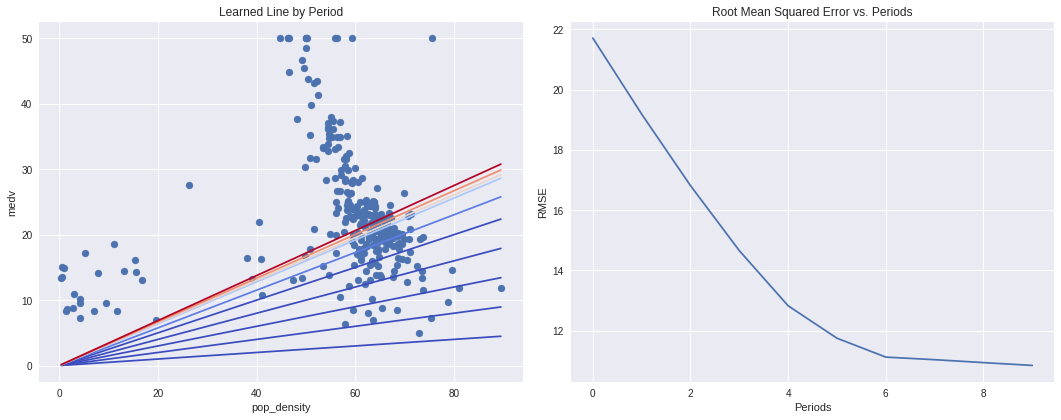

In [267]:
calibration_data = train_model(
    learning_rate=0.0002,
    steps=500,
    batch_size=5,
    input_feature="pop_density")

Train and Evaluate a Model

In [0]:
# From the TensorFlow validation tutorial
# https://colab.research.google.com/notebooks/mlcc/validation.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation-colab&hl=ko#scrollTo=_xSYTarykO8U
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of multiple features.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [0]:
# From the TensorFlow validation tutorial
# https://colab.research.google.com/notebooks/mlcc/validation.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation-colab&hl=ko#scrollTo=_xSYTarykO8U
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [0]:
# From the TensorFlow validation tutorial
# https://colab.research.google.com/notebooks/mlcc/validation.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation-colab&hl=ko#scrollTo=_xSYTarykO8U
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model of multiple features.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `boston_df` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `boston_df` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `boston_df` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `boston_df` to use as target for validation.
      
  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
  
  # Create input functions.
  training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["medv"], 
      batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(
      training_examples, 
      training_targets["medv"], 
      num_epochs=1, 
      shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(
      validation_examples, validation_targets["medv"], 
      num_epochs=1, 
      shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

In [0]:
# From the TensorFlow validation tutorial
# https://colab.research.google.com/notebooks/mlcc/validation.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation-colab&hl=ko#scrollTo=_xSYTarykO8U
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

Training model...
RMSE (on training data):
  period 00 : 22.19
  period 01 : 20.08
  period 02 : 18.06
  period 03 : 16.18
  period 04 : 14.57
  period 05 : 13.42
  period 06 : 12.46
  period 07 : 11.80
  period 08 : 11.20
  period 09 : 10.78
Model training finished.


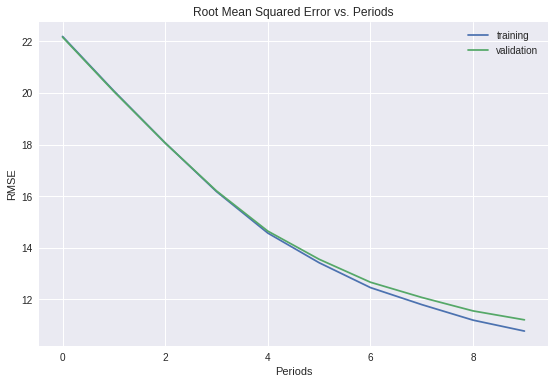

In [253]:
# From the TensorFlow validation tutorial
# https://colab.research.google.com/notebooks/mlcc/validation.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation-colab&hl=ko#scrollTo=_xSYTarykO8U
linear_regressor = train_model(
    learning_rate=0.00003,
    steps=300,
    batch_size=3,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

Evaluate on Test Data

In [260]:
test_examples = preprocess_features(boston_test_df)
test_targets = preprocess_targets(boston_test_df)

predict_test_input_fn = lambda: my_input_fn(
      test_examples, 
      test_targets["medv"], 
      num_epochs=1, 
      shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(test_predictions, test_targets))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

Final RMSE (on test data): 11.35
